## Exercises

### Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

### Use the iris database to answer the following quesitons:

1. What does the distribution of petal lengths look like?
2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
4. Which features would be best used to predict species?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

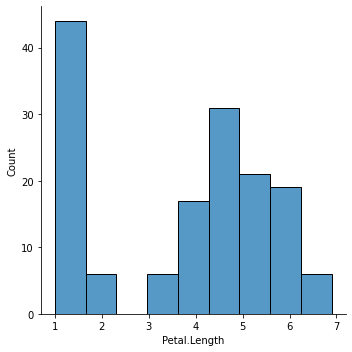

In [4]:
#1.1
sns.displot(data = iris, x = 'Petal.Length')

In [5]:
# 1.2 : .962865
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


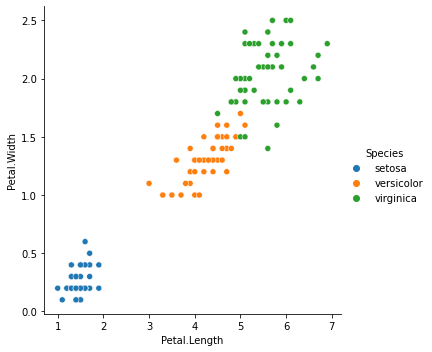

In [6]:
sns.relplot(data=iris, x = 'Petal.Length', y ='Petal.Width', hue = 'Species')

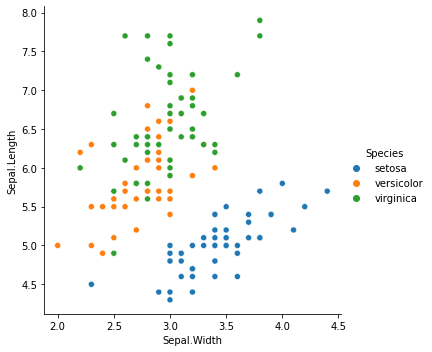

In [7]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, x = 'Sepal.Width', y = 'Sepal.Length', hue = 'Species')

<AxesSubplot:xlabel='Species', ylabel='Sepal.Length'>

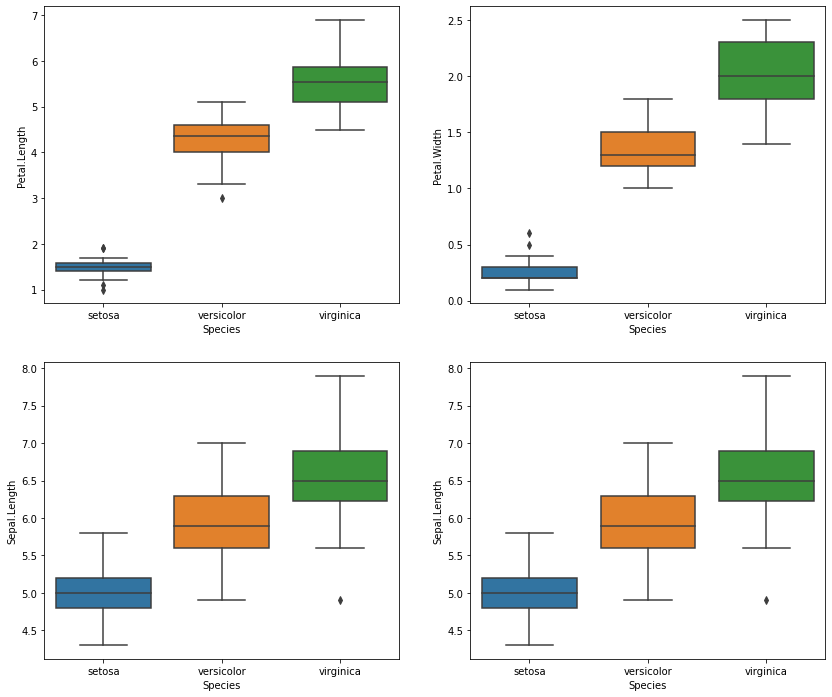

In [8]:
#4 . Which features would be best used to predict species? A. Pedal Width - least overlapp per pairplot
fig, ax=plt.subplots(2,2, figsize = (14, 12))
sns.boxplot(y='Petal.Length', x = 'Species', data = iris, ax=ax[0,0])
sns.boxplot(y='Petal.Width', x = 'Species', data = iris, ax=ax[0,1])
sns.boxplot(y='Sepal.Length', x = 'Species', data = iris, ax=ax[1,0])
sns.boxplot(y='Sepal.Length', x = 'Species', data = iris, ax=ax[1,1])

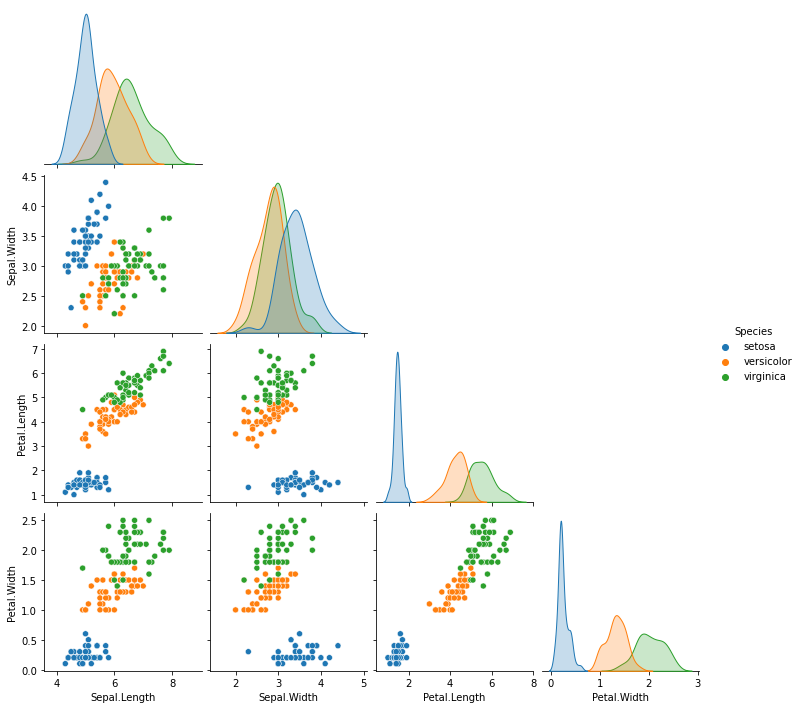

In [9]:
# Looking for a better visual to answer
sns.pairplot(data = iris, hue = 'Species', corner = True)

## Second Set
1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
 - Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.
3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?
4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [10]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
     # What do you notice? A. x's for dataset I, II, III are the same.
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [11]:
anscombe.groupby('dataset'). describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

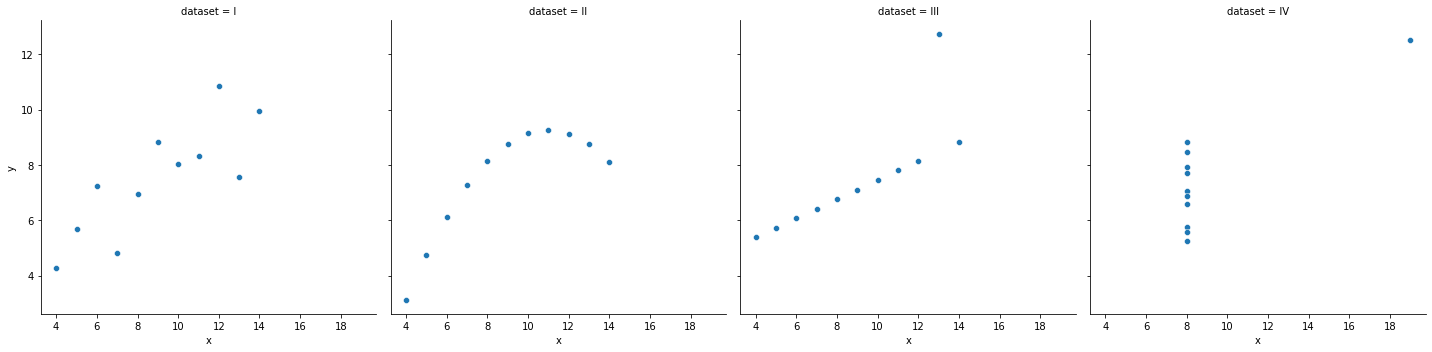

In [12]:
sns.relplot(data = anscombe, x='x', y='y',
           col = 'dataset')

In [13]:
# 2. Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.
sprays=data('InsectSprays')

In [14]:
data("InsectSprays", show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [15]:
sprays.dtypes

count     int64
spray    object
dtype: object

In [16]:
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

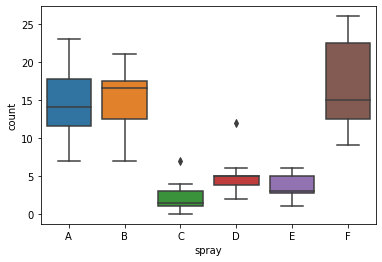

In [17]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data = sprays, x = 'spray', y='count')

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [18]:
swiss = data('swiss')

In [19]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [20]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [21]:
swiss.index

Index(['Courtelary', 'Delemont', 'Franches-Mnt', 'Moutier', 'Neuveville',
       'Porrentruy', 'Broye', 'Glane', 'Gruyere', 'Sarine', 'Veveyse', 'Aigle',
       'Aubonne', 'Avenches', 'Cossonay', 'Echallens', 'Grandson', 'Lausanne',
       'La Vallee', 'Lavaux', 'Morges', 'Moudon', 'Nyone', 'Orbe', 'Oron',
       'Payerne', 'Paysd'enhaut', 'Rolle', 'Vevey', 'Yverdon', 'Conthey',
       'Entremont', 'Herens', 'Martigwy', 'Monthey', 'St Maurice', 'Sierre',
       'Sion', 'Boudry', 'La Chauxdfnd', 'Le Locle', 'Neuchatel', 'Val de Ruz',
       'ValdeTravers', 'V. De Geneve', 'Rive Droite', 'Rive Gauche'],
      dtype='object')

In [22]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic > 50
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Morges,65.5,59.8,22,10,5.23,18.0,False
St Maurice,65.0,75.9,9,9,99.06,17.8,True
Veveyse,87.1,64.5,14,6,98.61,24.5,True
Le Locle,72.7,16.7,22,13,11.22,18.9,False
Martigwy,70.5,78.2,12,6,98.96,19.4,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Lavaux,65.1,73.0,19,9,2.84,20.0,False
Yverdon,65.4,49.5,15,8,6.10,22.5,False
La Chauxdfnd,65.7,7.7,29,11,13.79,20.5,False
ValdeTravers,67.6,18.7,25,7,8.65,19.5,False


In [23]:
swiss.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
is_catholic            bool
dtype: object

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

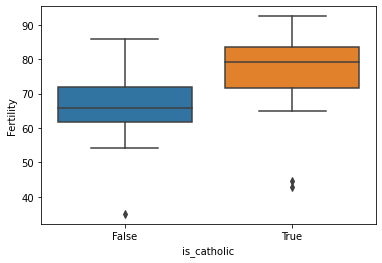

In [24]:
# Does whether or not a province is Catholic influence fertility?
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')
# didn't think answer is well seen

In [53]:
swiss['providence'] = swiss.index
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic,providence
Courtelary,80.2,17.0,15,12,9.96,22.2,False,Courtelary
Delemont,83.1,45.1,6,9,84.84,22.2,True,Delemont
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True,Franches-Mnt
Moutier,85.8,36.5,12,7,33.77,20.3,False,Moutier
Neuveville,76.9,43.5,17,15,5.16,20.6,False,Neuveville


In [57]:
swiss.index

Index(['Courtelary', 'Delemont', 'Franches-Mnt', 'Moutier', 'Neuveville',
       'Porrentruy', 'Broye', 'Glane', 'Gruyere', 'Sarine', 'Veveyse', 'Aigle',
       'Aubonne', 'Avenches', 'Cossonay', 'Echallens', 'Grandson', 'Lausanne',
       'La Vallee', 'Lavaux', 'Morges', 'Moudon', 'Nyone', 'Orbe', 'Oron',
       'Payerne', 'Paysd'enhaut', 'Rolle', 'Vevey', 'Yverdon', 'Conthey',
       'Entremont', 'Herens', 'Martigwy', 'Monthey', 'St Maurice', 'Sierre',
       'Sion', 'Boudry', 'La Chauxdfnd', 'Le Locle', 'Neuchatel', 'Val de Ruz',
       'ValdeTravers', 'V. De Geneve', 'Rive Droite', 'Rive Gauche'],
      dtype='object')

<AxesSubplot:>

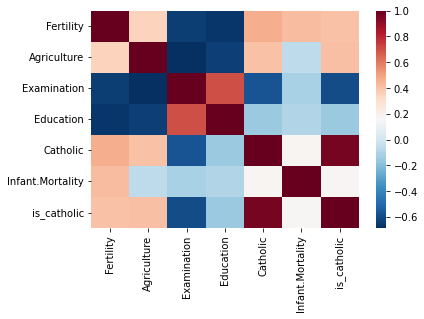

In [56]:
sns.heatmap(swiss.corr(), cmap = 'RdBu_r')

In [63]:
sns.heatmap(data = swiss, y = "providence", x = 'Fertility', hue = 'is_catholic')

ValueError: could not convert string to float: 'Courtelary'

In [26]:
# What measure correlates most strongly with fertility? A. Eduction negative correlation, Pos is_Catholic
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

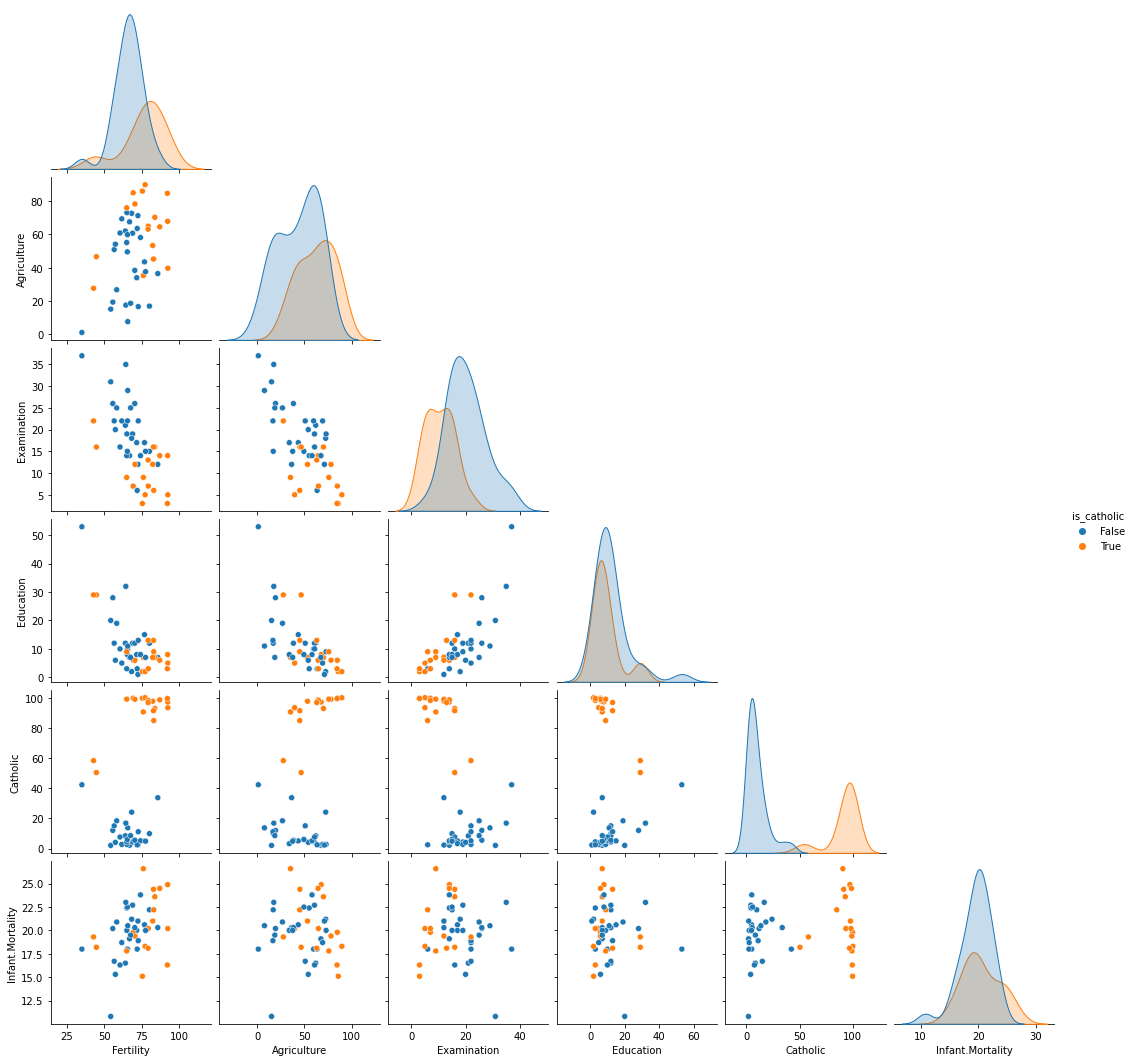

In [48]:
# testing pairplot for group question
sns.pairplot(data = swiss, hue = 'is_catholic', corner = True)

### Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [27]:
from env import host, user, password
dbname = 'chipotle'
url = f'mysql+pymysql://{user}:{password}@{host}/{dbname}'
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [28]:
chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype('float')
chipotle.sample(5)

/var/folders/0d/pgx59prx25q_12vq2yt8dvtw0000gn/T/ipykernel_16740/2145750268.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['item_price'] = chipotle.item_price.str.replace('$', '').astype('float')


,id,order_id,quantity,item_name,choice_description,item_price
2761,2762,1096,1,Chips and Guacamole,nan,3.99
3624,3625,1450,1,Chips and Tomatillo Green Chili Salsa,nan,2.95
3981,3982,1595,1,Bottled Water,nan,1.50
270,271,118,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto Beans, Rice, Cheese, Sour Cream]]",8.49
677,678,280,1,Veggie Bowl,"[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]",8.49


In [64]:
chipotle['si_price'] = chipotle['item_price']/chipotle['quantity']
chipotle_p = chipotle.groupby('item_name').item_price.sum().nlargest(4)
chipotle_p

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [30]:
dipsss=pd.DataFrame({'item':chipotle_p.index,'revenue':chipotle_p.values})
dipsss.head()

,item,revenue
0,Chicken Bowl,7011.51
1,Chicken Burrito,5240.20
2,Steak Burrito,3677.58
3,Steak Bowl,2159.07


<AxesSubplot:xlabel='revenue', ylabel='item'>

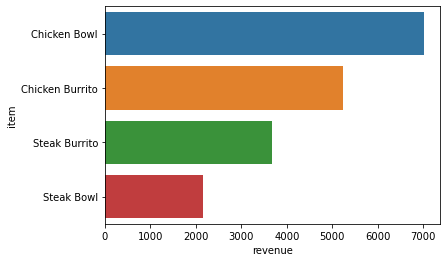

In [31]:
sns.barplot(data=dipsss,x='revenue', y='item')

### Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [32]:
sleepstudy = data('sleepstudy')

In [33]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [34]:
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [35]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [39]:
sleepstudy.groupby('Subject')

In [36]:
sleepstudy.sample(10)

,Reaction,Days,Subject
77,305.5248,6,334
87,245.4523,6,335
138,360.4326,7,352
99,455.8643,8,337
104,254.9220,3,349
18,217.7272,7,309
61,283.8424,0,333
40,354.0487,9,330
62,289.5550,1,333
98,416.6923,7,337


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

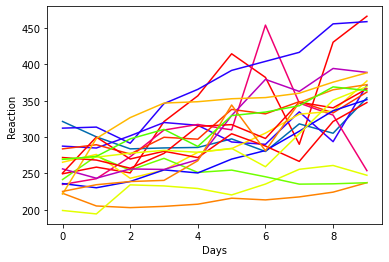

In [50]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', palette = 'prism', hue = 'Subject', legend=False)

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

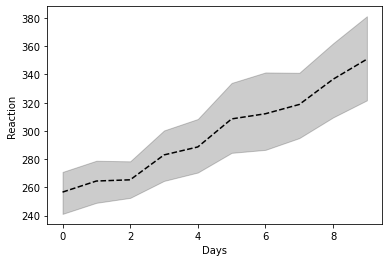

In [51]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')

Text(0, 265, 'Average')

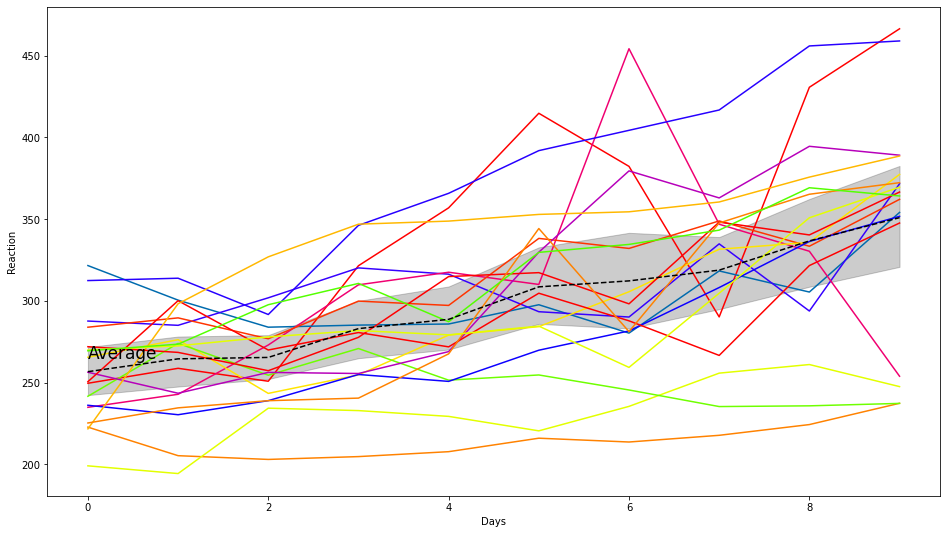

In [49]:
plt.figure(figsize=(16, 9))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', palette = 'prism', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean')
plt.annotate('Average',(0,265),fontsize=17)